In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')
print(강서_대여소_ID)

      대여소_ID
0     ST-975
1     ST-837
2     ST-836
3     ST-835
4     ST-834
..       ...
219  ST-1066
220  ST-1065
221  ST-1064
222  ST-1063
223  ST-1062

[224 rows x 1 columns]


In [3]:
따릉이대여소_마스터정보 = pd.read_csv('../../Data/따릉이/서울시 따릉이대여소 마스터 정보.csv',encoding='cp949')
print(따릉이대여소_마스터정보)

       대여소_ID                      주소1            주소2         위도          경도
0      ST-999       서울특별시 양천구 목동서로 280  목동아파트 8단지 상가동   0.000000    0.000000
1      ST-998       서울특별시 양천구 목동서로 130  목동아파트 4단지 상가동   0.000000    0.000000
2      ST-997       서울특별시 양천구 목동중앙로 49  목동3단지 시내버스정류장  37.534390  126.869598
3      ST-996   서울특별시 양천구 남부순환로88길5-16     양강중학교앞 교차로  37.524334  126.850548
4      ST-995  서울특별시 양천구 중앙로 153 공중화장실            NaN  37.510597  126.857323
...       ...                      ...            ...        ...         ...
3281  ST-1002     서울특별시 양천구 목동동로 316-6   서울시 도로환경관리센터  37.529900  126.876541
3282  ST-1001      서울특별시 양천구 남부순환로4길20        서서울호수공원   0.000000    0.000000
3283  ST-1000        서울특별시 양천구 신정동 236    서부식자재마트 건너편  37.510380  126.866798
3284   ST-100       서울특별시 광진구 아차산로 262    더샵스타시티 C동 앞  37.536667  127.073593
3285    ST-10         서울특별시 마포구 양화로 93            427  37.552746  126.918617

[3286 rows x 5 columns]


In [4]:
강서_마스터정보 = 따릉이대여소_마스터정보[따릉이대여소_마스터정보['대여소_ID'].isin(강서_대여소_ID['대여소_ID'])]

In [5]:
강서_마스터정보 = 강서_마스터정보.reset_index()

In [6]:
강서_마스터정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   224 non-null    int64  
 1   대여소_ID  224 non-null    object 
 2   주소1     224 non-null    object 
 3   주소2     80 non-null     object 
 4   위도      224 non-null    float64
 5   경도      224 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 10.6+ KB


In [7]:
강서_마스터정보 = 강서_마스터정보.drop('index',axis=1)
강서_마스터정보

,대여소_ID,주소1,주소2,위도,경도
0,ST-975,서울특별시 강서구 마곡서1로 111-12,신방화역환승주차장,37.567284,126.818275
1,ST-837,서울특별시 강서구 강서로 지하 54,강서구 화곡동 662-5,37.532551,126.846321
2,ST-836,서울특별시 강서구 곰달래로37길 13,강서구곰달래로37길 13,37.531780,126.854485
3,ST-835,서울특별시 강서구 강서로 304,강서구 내발산동 724-42,37.552914,126.836571
4,ST-834,서울특별시 강서구 공항대로 329,강서구 등촌동 675-7,37.558197,126.844261
...,...,...,...,...,...
219,ST-1066,서울특별시 서울 강서구 내발산동 741-8,마곡수명산파크2단지 교차로,0.000000,0.000000
220,ST-1065,서울특별시 강서구 마곡동 797-5,NaN,37.558949,126.837173
221,ST-1064,서울특별시 강서구 마곡동 728-168,마곡역7번출구,37.558311,126.826523
222,ST-1063,서울특별시 강서구 공항대로 163 마곡역(5호선),NaN,37.560207,126.824142


In [8]:
출퇴근_통합정보 = pd.read_csv('./출퇴근시간_대여소_이용량_통합 - 출퇴근시간_대여소_이용량.csv',encoding='utf-8')
print(출퇴근_통합정보)

     Unnamed: 0   대여소_ID 지구 분류(출근) 지구 분류(퇴근) 일치여부  강서_데이터_시작(출근)  \
0             0  ST-1062        주거        주거   일치         3817.0   
1             1  ST-1063        업무        업무   일치         5061.0   
2             2  ST-1064        업무        업무   일치         3900.0   
3             3  ST-1065        주거        주거   일치         5849.0   
4             4  ST-1067        주거        주거   일치         3604.0   
..          ...      ...       ...       ...  ...            ...   
190         190   ST-829        주거        업무  불일치         1344.0   
191         191   ST-831        주거        주거   일치         2732.0   
192         192   ST-834        업무        주거  불일치         3344.0   
193         193   ST-835        주거        주거   일치         4274.0   
194         194   ST-975        주거        주거   일치         2979.0   

     강서_데이터_종료(출근)  차이(출근)  차이 절대값(출근)  총 이용량(시작 + 종료)(출근)  강서_데이터_시작(퇴근)  \
0           2303.0  1514.0      1514.0              6120.0           4052   
1           8806.0 -3745.0   

In [9]:
출퇴근_통합정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          195 non-null    int64  
 1   대여소_ID              195 non-null    object 
 2   지구 분류(출근)           194 non-null    object 
 3   지구 분류(퇴근)           194 non-null    object 
 4   일치여부                194 non-null    object 
 5   강서_데이터_시작(출근)       194 non-null    float64
 6   강서_데이터_종료(출근)       194 non-null    float64
 7   차이(출근)              194 non-null    float64
 8   차이 절대값(출근)          194 non-null    float64
 9   총 이용량(시작 + 종료)(출근)  194 non-null    float64
 10  강서_데이터_시작(퇴근)       195 non-null    int64  
 11  강서_데이터_종료(퇴근)       195 non-null    int64  
 12  차이(퇴근)              195 non-null    int64  
 13  차이절대값(퇴근)           195 non-null    int64  
 14  총 이용량(시작 + 종료)(퇴근)  195 non-null    int64  
dtypes: float64(5), int64(6), object(4)
memory usage: 23.0+ KB

In [10]:
출퇴근_통합정보 = 출퇴근_통합정보.drop('Unnamed: 0', axis=1)

In [11]:
출퇴근_통합정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   대여소_ID              195 non-null    object 
 1   지구 분류(출근)           194 non-null    object 
 2   지구 분류(퇴근)           194 non-null    object 
 3   일치여부                194 non-null    object 
 4   강서_데이터_시작(출근)       194 non-null    float64
 5   강서_데이터_종료(출근)       194 non-null    float64
 6   차이(출근)              194 non-null    float64
 7   차이 절대값(출근)          194 non-null    float64
 8   총 이용량(시작 + 종료)(출근)  194 non-null    float64
 9   강서_데이터_시작(퇴근)       195 non-null    int64  
 10  강서_데이터_종료(퇴근)       195 non-null    int64  
 11  차이(퇴근)              195 non-null    int64  
 12  차이절대값(퇴근)           195 non-null    int64  
 13  총 이용량(시작 + 종료)(퇴근)  195 non-null    int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 21.5+ KB


In [12]:
출퇴근_통합정보.rename(columns={'대여소_ID':'대여소_ID',
                               '지구 분류(출근)':'지구분류(출)',
                               '지구 분류(퇴근)':'지구분류(퇴)',
                               '일치여부':'분류일치여부',
                               '강서_데이터_시작(출근)':'시작(출)',
                               '강서_데이터_종료(출근)':'종료(출)',
                               '차이(출근)':'차이(출)',
                               '차이 절대값(출근)':'차이절대값(출)',
                               '총 이용량(시작 + 종료)(출근)':'총이용량(출)',
                               '강서_데이터_시작(퇴근)':'시작(퇴)',
                               '강서_데이터_종료(퇴근)':'종료(퇴)',
                               '차이(퇴근)':'차이(퇴)',
                               '차이절대값(퇴근)':'차이절대값(퇴)',
                               '총 이용량(시작 + 종료)(퇴근)':'총이용량(퇴)'
                               }, inplace=True)

In [13]:
출퇴근_통합정보

,대여소_ID,지구분류(출),지구분류(퇴),분류일치여부,시작(출),종료(출),차이(출),차이절대값(출),총이용량(출),시작(퇴),종료(퇴),차이(퇴),차이절대값(퇴),총이용량(퇴)
0,ST-1062,주거,주거,일치,3817.0,2303.0,1514.0,1514.0,6120.0,4052,5420,-1368,1368,9472
1,ST-1063,업무,업무,일치,5061.0,8806.0,-3745.0,3745.0,13867.0,5762,3109,2653,2653,8871
2,ST-1064,업무,업무,일치,3900.0,8571.0,-4671.0,4671.0,12471.0,8962,5449,3513,3513,14411
3,ST-1065,주거,주거,일치,5849.0,5590.0,259.0,259.0,11439.0,14935,16778,-1843,1843,31713
4,ST-1067,주거,주거,일치,3604.0,2990.0,614.0,614.0,6594.0,2700,3810,-1110,1110,6510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,ST-829,주거,업무,불일치,1344.0,1005.0,339.0,339.0,2349.0,1956,1923,33,33,3879
191,ST-831,주거,주거,일치,2732.0,1538.0,1194.0,1194.0,4270.0,4079,4576,-497,497,8655
192,ST-834,업무,주거,불일치,3344.0,4368.0,-1024.0,1024.0,7712.0,6339,6460,-121,121,12799
193,ST-835,주거,주거,일치,4274.0,2164.0,2110.0,2110.0,6438.0,5497,7926,-2429,2429,13423


In [14]:
출퇴근_통합정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여소_ID    195 non-null    object 
 1   지구분류(출)   194 non-null    object 
 2   지구분류(퇴)   194 non-null    object 
 3   분류일치여부    194 non-null    object 
 4   시작(출)     194 non-null    float64
 5   종료(출)     194 non-null    float64
 6   차이(출)     194 non-null    float64
 7   차이절대값(출)  194 non-null    float64
 8   총이용량(출)   194 non-null    float64
 9   시작(퇴)     195 non-null    int64  
 10  종료(퇴)     195 non-null    int64  
 11  차이(퇴)     195 non-null    int64  
 12  차이절대값(퇴)  195 non-null    int64  
 13  총이용량(퇴)   195 non-null    int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 21.5+ KB


In [15]:
출퇴근_통합정보.columns

Index(['대여소_ID', '지구분류(출)', '지구분류(퇴)', '분류일치여부', '시작(출)', '종료(출)', '차이(출)',
       '차이절대값(출)', '총이용량(출)', '시작(퇴)', '종료(퇴)', '차이(퇴)', '차이절대값(퇴)',
       '총이용량(퇴)'],
      dtype='object')

In [16]:
출퇴근_통합정보 = 출퇴근_통합정보.fillna(0)

In [17]:
출퇴근_통합정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여소_ID    195 non-null    object 
 1   지구분류(출)   195 non-null    object 
 2   지구분류(퇴)   195 non-null    object 
 3   분류일치여부    195 non-null    object 
 4   시작(출)     195 non-null    float64
 5   종료(출)     195 non-null    float64
 6   차이(출)     195 non-null    float64
 7   차이절대값(출)  195 non-null    float64
 8   총이용량(출)   195 non-null    float64
 9   시작(퇴)     195 non-null    int64  
 10  종료(퇴)     195 non-null    int64  
 11  차이(퇴)     195 non-null    int64  
 12  차이절대값(퇴)  195 non-null    int64  
 13  총이용량(퇴)   195 non-null    int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 21.5+ KB


In [18]:
출퇴근_통합정보.columns

Index(['대여소_ID', '지구분류(출)', '지구분류(퇴)', '분류일치여부', '시작(출)', '종료(출)', '차이(출)',
       '차이절대값(출)', '총이용량(출)', '시작(퇴)', '종료(퇴)', '차이(퇴)', '차이절대값(퇴)',
       '총이용량(퇴)'],
      dtype='object')

In [19]:
출퇴근_통합정보[['시작(출)', '종료(출)', '차이(출)', '차이절대값(출)', '총이용량(출)']] = 출퇴근_통합정보[['시작(출)', '종료(출)', '차이(출)', '차이절대값(출)', '총이용량(출)']].astype(int)

In [20]:
출퇴근_통합정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   대여소_ID    195 non-null    object
 1   지구분류(출)   195 non-null    object
 2   지구분류(퇴)   195 non-null    object
 3   분류일치여부    195 non-null    object
 4   시작(출)     195 non-null    int32 
 5   종료(출)     195 non-null    int32 
 6   차이(출)     195 non-null    int32 
 7   차이절대값(출)  195 non-null    int32 
 8   총이용량(출)   195 non-null    int32 
 9   시작(퇴)     195 non-null    int64 
 10  종료(퇴)     195 non-null    int64 
 11  차이(퇴)     195 non-null    int64 
 12  차이절대값(퇴)  195 non-null    int64 
 13  총이용량(퇴)   195 non-null    int64 
dtypes: int32(5), int64(5), object(4)
memory usage: 17.6+ KB


In [21]:
출퇴근_통합정보[:5]

,대여소_ID,지구분류(출),지구분류(퇴),분류일치여부,시작(출),종료(출),차이(출),차이절대값(출),총이용량(출),시작(퇴),종료(퇴),차이(퇴),차이절대값(퇴),총이용량(퇴)
0,ST-1062,주거,주거,일치,3817,2303,1514,1514,6120,4052,5420,-1368,1368,9472
1,ST-1063,업무,업무,일치,5061,8806,-3745,3745,13867,5762,3109,2653,2653,8871
2,ST-1064,업무,업무,일치,3900,8571,-4671,4671,12471,8962,5449,3513,3513,14411
3,ST-1065,주거,주거,일치,5849,5590,259,259,11439,14935,16778,-1843,1843,31713
4,ST-1067,주거,주거,일치,3604,2990,614,614,6594,2700,3810,-1110,1110,6510


In [22]:
출퇴근_통합정보['총이용량(출)'].values.sum()

982108

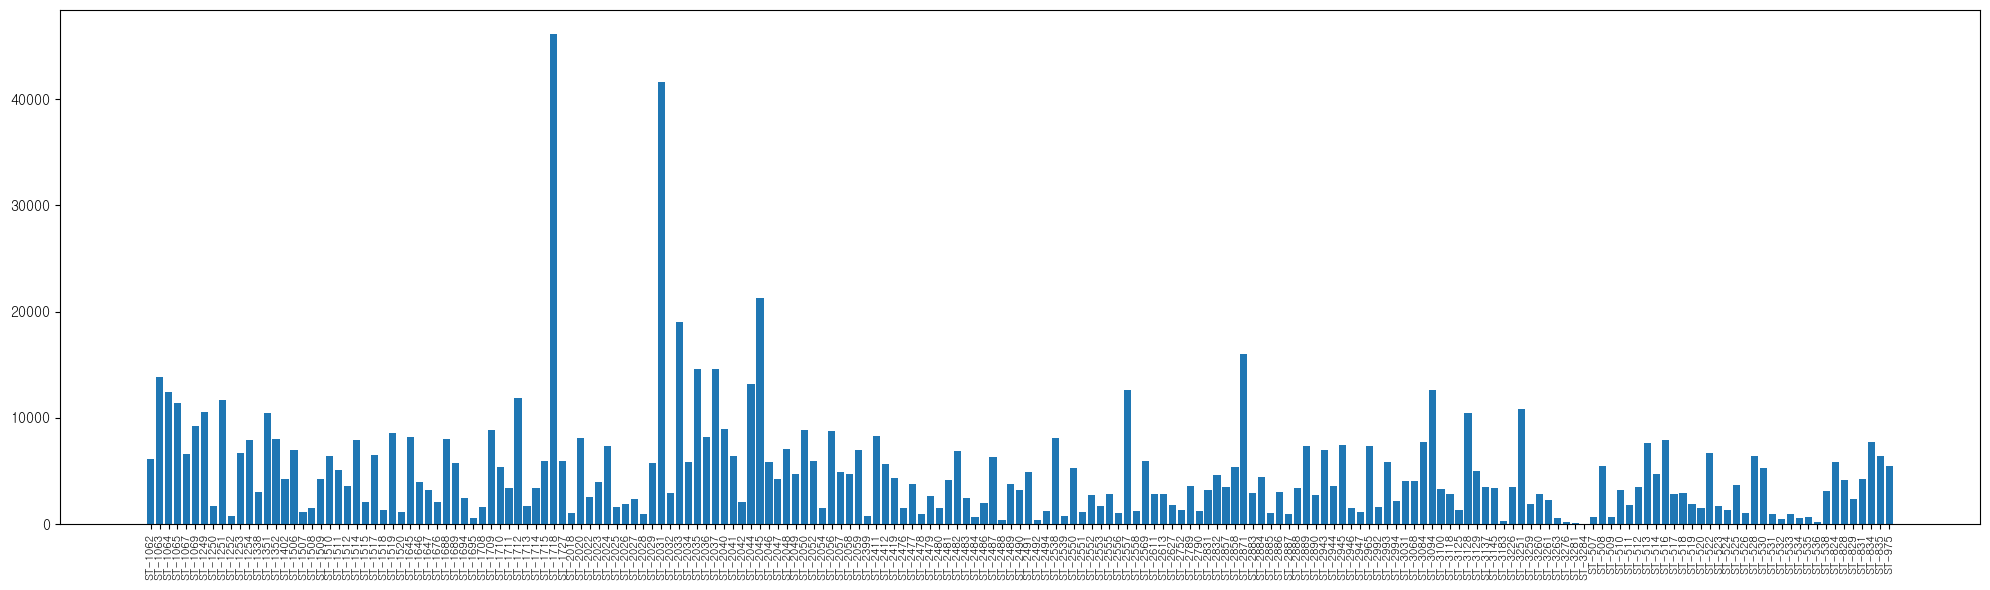

In [23]:
fig, ax = plt.subplots(figsize = (20,6))

ax.bar(출퇴근_통합정보['대여소_ID'], 출퇴근_통합정보['총이용량(출)'])
plt.xticks(rotation=90,fontsize=8)

plt.tight_layout()
plt.show()

In [24]:
강서_마스터정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소_ID  224 non-null    object 
 1   주소1     224 non-null    object 
 2   주소2     80 non-null     object 
 3   위도      224 non-null    float64
 4   경도      224 non-null    float64
dtypes: float64(2), object(3)
memory usage: 8.9+ KB


In [25]:
불일치_대여소 = 출퇴근_통합정보[출퇴근_통합정보['분류일치여부'] == '불일치']
불일치_대여소.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 17 to 192
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   대여소_ID    33 non-null     object
 1   지구분류(출)   33 non-null     object
 2   지구분류(퇴)   33 non-null     object
 3   분류일치여부    33 non-null     object
 4   시작(출)     33 non-null     int32 
 5   종료(출)     33 non-null     int32 
 6   차이(출)     33 non-null     int32 
 7   차이절대값(출)  33 non-null     int32 
 8   총이용량(출)   33 non-null     int32 
 9   시작(퇴)     33 non-null     int64 
 10  종료(퇴)     33 non-null     int64 
 11  차이(퇴)     33 non-null     int64 
 12  차이절대값(퇴)  33 non-null     int64 
 13  총이용량(퇴)   33 non-null     int64 
dtypes: int32(5), int64(5), object(4)
memory usage: 3.2+ KB


In [26]:
강서_마스터정보['대여소_ID'].values

array(['ST-975', 'ST-837', 'ST-836', 'ST-835', 'ST-834', 'ST-833',
       'ST-832', 'ST-831', 'ST-829', 'ST-828', 'ST-824', 'ST-538',
       'ST-537', 'ST-536', 'ST-535', 'ST-534', 'ST-533', 'ST-532',
       'ST-531', 'ST-530', 'ST-529', 'ST-528', 'ST-527', 'ST-526',
       'ST-525', 'ST-524', 'ST-523', 'ST-522', 'ST-521', 'ST-520',
       'ST-519', 'ST-518', 'ST-517', 'ST-516', 'ST-515', 'ST-514',
       'ST-513', 'ST-512', 'ST-511', 'ST-510', 'ST-509', 'ST-508',
       'ST-507', 'ST-3284', 'ST-3281', 'ST-3276', 'ST-3263', 'ST-3261',
       'ST-3260', 'ST-3259', 'ST-3251', 'ST-3226', 'ST-3183', 'ST-3145',
       'ST-3137', 'ST-3129', 'ST-3128', 'ST-3125', 'ST-3118', 'ST-3100',
       'ST-3094', 'ST-3084', 'ST-3068', 'ST-3031', 'ST-2994', 'ST-2993',
       'ST-2992', 'ST-2965', 'ST-2947', 'ST-2946', 'ST-2945', 'ST-2944',
       'ST-2943', 'ST-2890', 'ST-2889', 'ST-2888', 'ST-2887', 'ST-2886',
       'ST-2885', 'ST-2884', 'ST-2883', 'ST-2871', 'ST-2858', 'ST-2857',
       'ST-2832', 'ST

In [27]:
불일치_대여소['대여소_ID']

17     ST-1507
19     ST-1509
22     ST-1512
28     ST-1520
32     ST-1676
35     ST-1694
45     ST-1718
47     ST-2018
48     ST-2020
55     ST-2028
65     ST-2041
71     ST-2048
77     ST-2057
84     ST-2476
91     ST-2483
110    ST-2558
115    ST-2752
120    ST-2857
129    ST-2889
135    ST-2947
144    ST-3100
162     ST-508
163     ST-509
167     ST-513
172     ST-519
173     ST-520
175     ST-523
178     ST-526
179     ST-528
181     ST-531
184     ST-534
190     ST-829
192     ST-834
Name: 대여소_ID, dtype: object

In [28]:
강서_마스터정보['대여소_ID'].isin(불일치_대여소['대여소_ID'])

0      False
1      False
2      False
3      False
4       True
       ...  
219    False
220    False
221    False
222    False
223    False
Name: 대여소_ID, Length: 224, dtype: bool

In [29]:
for i in list(불일치_대여소['대여소_ID']):
    print(i)

ST-1507
ST-1509
ST-1512
ST-1520
ST-1676
ST-1694
ST-1718
ST-2018
ST-2020
ST-2028
ST-2041
ST-2048
ST-2057
ST-2476
ST-2483
ST-2558
ST-2752
ST-2857
ST-2889
ST-2947
ST-3100
ST-508
ST-509
ST-513
ST-519
ST-520
ST-523
ST-526
ST-528
ST-531
ST-534
ST-829
ST-834


In [30]:
강서_마스터정보['대여소_ID'].index

RangeIndex(start=0, stop=224, step=1)

In [31]:
불일치_대여소['대여소_ID']

17     ST-1507
19     ST-1509
22     ST-1512
28     ST-1520
32     ST-1676
35     ST-1694
45     ST-1718
47     ST-2018
48     ST-2020
55     ST-2028
65     ST-2041
71     ST-2048
77     ST-2057
84     ST-2476
91     ST-2483
110    ST-2558
115    ST-2752
120    ST-2857
129    ST-2889
135    ST-2947
144    ST-3100
162     ST-508
163     ST-509
167     ST-513
172     ST-519
173     ST-520
175     ST-523
178     ST-526
179     ST-528
181     ST-531
184     ST-534
190     ST-829
192     ST-834
Name: 대여소_ID, dtype: object

In [32]:
출퇴근_통합정보

,대여소_ID,지구분류(출),지구분류(퇴),분류일치여부,시작(출),종료(출),차이(출),차이절대값(출),총이용량(출),시작(퇴),종료(퇴),차이(퇴),차이절대값(퇴),총이용량(퇴)
0,ST-1062,주거,주거,일치,3817,2303,1514,1514,6120,4052,5420,-1368,1368,9472
1,ST-1063,업무,업무,일치,5061,8806,-3745,3745,13867,5762,3109,2653,2653,8871
2,ST-1064,업무,업무,일치,3900,8571,-4671,4671,12471,8962,5449,3513,3513,14411
3,ST-1065,주거,주거,일치,5849,5590,259,259,11439,14935,16778,-1843,1843,31713
4,ST-1067,주거,주거,일치,3604,2990,614,614,6594,2700,3810,-1110,1110,6510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,ST-829,주거,업무,불일치,1344,1005,339,339,2349,1956,1923,33,33,3879
191,ST-831,주거,주거,일치,2732,1538,1194,1194,4270,4079,4576,-497,497,8655
192,ST-834,업무,주거,불일치,3344,4368,-1024,1024,7712,6339,6460,-121,121,12799
193,ST-835,주거,주거,일치,4274,2164,2110,2110,6438,5497,7926,-2429,2429,13423


In [33]:
출퇴근_통합정보.columns

Index(['대여소_ID', '지구분류(출)', '지구분류(퇴)', '분류일치여부', '시작(출)', '종료(출)', '차이(출)',
       '차이절대값(출)', '총이용량(출)', '시작(퇴)', '종료(퇴)', '차이(퇴)', '차이절대값(퇴)',
       '총이용량(퇴)'],
      dtype='object')

In [34]:
len(출퇴근_통합정보['차이절대값(출)'] + 출퇴근_통합정보['차이절대값(퇴)'])

195

In [35]:
출퇴근_통합정보['차이절대값합'] = 출퇴근_통합정보['차이절대값(출)'] + 출퇴근_통합정보['차이절대값(퇴)']

In [36]:
출퇴근_통합정보['총이용량합'] = 출퇴근_통합정보['총이용량(출)'] + 출퇴근_통합정보['총이용량(퇴)']

In [37]:
출퇴근_통합정보

,대여소_ID,지구분류(출),지구분류(퇴),분류일치여부,시작(출),종료(출),차이(출),차이절대값(출),총이용량(출),시작(퇴),종료(퇴),차이(퇴),차이절대값(퇴),총이용량(퇴),차이절대값합,총이용량합
0,ST-1062,주거,주거,일치,3817,2303,1514,1514,6120,4052,5420,-1368,1368,9472,2882,15592
1,ST-1063,업무,업무,일치,5061,8806,-3745,3745,13867,5762,3109,2653,2653,8871,6398,22738
2,ST-1064,업무,업무,일치,3900,8571,-4671,4671,12471,8962,5449,3513,3513,14411,8184,26882
3,ST-1065,주거,주거,일치,5849,5590,259,259,11439,14935,16778,-1843,1843,31713,2102,43152
4,ST-1067,주거,주거,일치,3604,2990,614,614,6594,2700,3810,-1110,1110,6510,1724,13104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,ST-829,주거,업무,불일치,1344,1005,339,339,2349,1956,1923,33,33,3879,372,6228
191,ST-831,주거,주거,일치,2732,1538,1194,1194,4270,4079,4576,-497,497,8655,1691,12925
192,ST-834,업무,주거,불일치,3344,4368,-1024,1024,7712,6339,6460,-121,121,12799,1145,20511
193,ST-835,주거,주거,일치,4274,2164,2110,2110,6438,5497,7926,-2429,2429,13423,4539,19861


In [38]:
출근주거 = 출퇴근_통합정보[출퇴근_통합정보['지구분류(출)'] == '주거']
출근업무 = 출퇴근_통합정보[출퇴근_통합정보['지구분류(출)'] == '업무']

In [39]:
출근주거['차이절대값합']

0      2882
3      2102
4      1724
5      4196
8      1058
       ... 
189    2253
190     372
191    1691
193    4539
194    1199
Name: 차이절대값합, Length: 122, dtype: int64

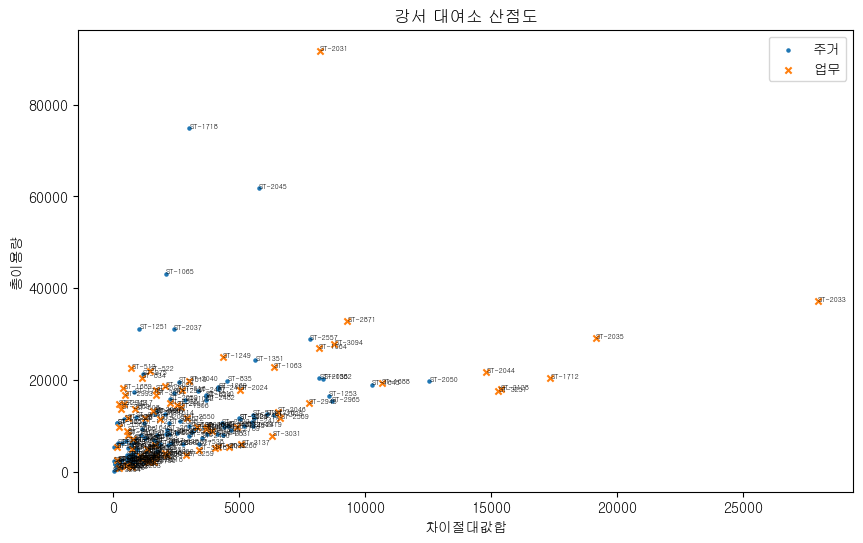

In [40]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(출근주거['차이절대값합'], 출근주거['총이용량합'], label = '주거', marker='.', s=20)
ax.scatter(출근업무['차이절대값합'], 출근업무['총이용량합'], label = '업무', marker='x', s=20)

for i, txt in enumerate(출퇴근_통합정보['대여소_ID']):
    plt.annotate(txt, (출퇴근_통합정보['차이절대값합'][i], 출퇴근_통합정보['총이용량합'][i]), fontsize=5)

plt.title('강서 대여소 산점도')
plt.xlabel('차이절대값합')
plt.ylabel('총이용량')

plt.legend(loc='best')

plt.show()

In [41]:
# import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go
# import pandas as pd
# import matplotlib.font_manager as fm

In [42]:
# sns.set_style('whitegrid')
# sns.scatterplot(x=출퇴근_통합정보['차이절대값합'], y=출퇴근_통합정보['총이용량합'])
# plt.title('강서 대여소 산점도')
# plt.xlabel('차이절대값합')
# plt.ylabel('총이용량')

# plt.show()

In [43]:
len(출퇴근_통합정보[출퇴근_통합정보['총이용량합'] <= 18000])

162

In [44]:
출퇴근_통합정보.columns

Index(['대여소_ID', '지구분류(출)', '지구분류(퇴)', '분류일치여부', '시작(출)', '종료(출)', '차이(출)',
       '차이절대값(출)', '총이용량(출)', '시작(퇴)', '종료(퇴)', '차이(퇴)', '차이절대값(퇴)', '총이용량(퇴)',
       '차이절대값합', '총이용량합'],
      dtype='object')

In [45]:
출퇴근_통합정보.sort_values(by='총이용량합',ascending=False)
출퇴근_통합정보.sort_values(by='총이용량합',ascending=False)[:10]

,대여소_ID,지구분류(출),지구분류(퇴),분류일치여부,시작(출),종료(출),차이(출),차이절대값(출),총이용량(출),시작(퇴),종료(퇴),차이(퇴),차이절대값(퇴),총이용량(퇴),차이절대값합,총이용량합
57,ST-2031,업무,업무,일치,19071,22501,-3430,3430,41572,27487,22712,4775,4775,50199,8205,91771
45,ST-1718,주거,업무,불일치,23247,22826,421,421,46073,15779,13166,2613,2613,28945,3034,75018
68,ST-2045,주거,주거,일치,11505,9782,1723,1723,21287,18223,22287,-4064,4064,40510,5787,61797
3,ST-1065,주거,주거,일치,5849,5590,259,259,11439,14935,16778,-1843,1843,31713,2102,43152
59,ST-2033,업무,업무,일치,999,18038,-17039,17039,19037,14530,3603,10927,10927,18133,27966,37170
122,ST-2871,업무,업무,일치,5649,10317,-4668,4668,15966,10778,6150,4628,4628,16928,9296,32894
8,ST-1251,주거,주거,일치,6256,5439,817,817,11695,9621,9862,-241,241,19483,1058,31178
63,ST-2037,주거,주거,일치,7982,6663,1319,1319,14645,7693,8807,-1114,1114,16500,2433,31145
61,ST-2035,업무,업무,일치,1356,13251,-11895,11895,14607,10864,3613,7251,7251,14477,19146,29084
109,ST-2557,주거,주거,일치,8627,4041,4586,4586,12668,6549,9782,-3233,3233,16331,7819,28999


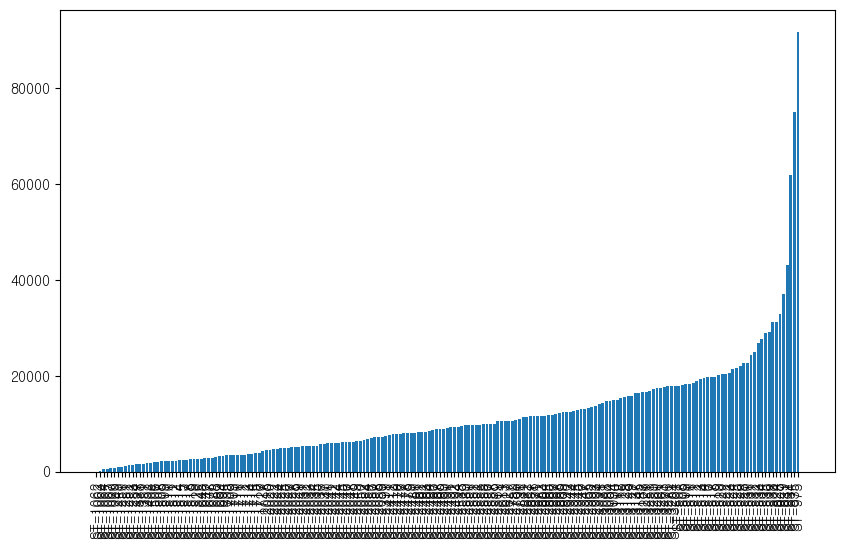

In [46]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(출퇴근_통합정보['대여소_ID'], 출퇴근_통합정보.sort_values(by='총이용량합')['총이용량합'])

plt.xticks(rotation=90)
plt.show()

In [47]:
출퇴근_통합정보.sort_values(by='차이절대값합',ascending=False)

출퇴근_통합정보.sort_values(by='차이절대값합',ascending=False)[:10]

,대여소_ID,지구분류(출),지구분류(퇴),분류일치여부,시작(출),종료(출),차이(출),차이절대값(출),총이용량(출),시작(퇴),종료(퇴),차이(퇴),차이절대값(퇴),총이용량(퇴),차이절대값합,총이용량합
59,ST-2033,업무,업무,일치,999,18038,-17039,17039,19037,14530,3603,10927,10927,18133,27966,37170
61,ST-2035,업무,업무,일치,1356,13251,-11895,11895,14607,10864,3613,7251,7251,14477,19146,29084
41,ST-1712,업무,업무,일치,711,11127,-10416,10416,11838,7715,787,6928,6928,8502,17344,20340
147,ST-3128,업무,업무,일치,587,9877,-9290,9290,10464,6822,728,6094,6094,7550,15384,18014
153,ST-3251,업무,업무,일치,726,10118,-9392,9392,10844,6301,409,5892,5892,6710,15284,17554
67,ST-2044,업무,업무,일치,1991,11176,-9185,9185,13167,7089,1464,5625,5625,8553,14810,21720
73,ST-2050,주거,주거,일치,8055,814,7241,7241,8869,2776,8086,-5310,5310,10862,12551,19731
33,ST-1688,업무,업무,일치,909,7066,-6157,6157,7975,7936,3423,4513,4513,11359,10670,19334
29,ST-1645,주거,주거,일치,7232,922,6310,6310,8154,3392,7366,-3974,3974,10758,10284,18912
122,ST-2871,업무,업무,일치,5649,10317,-4668,4668,15966,10778,6150,4628,4628,16928,9296,32894


<BarContainer object of 195 artists>

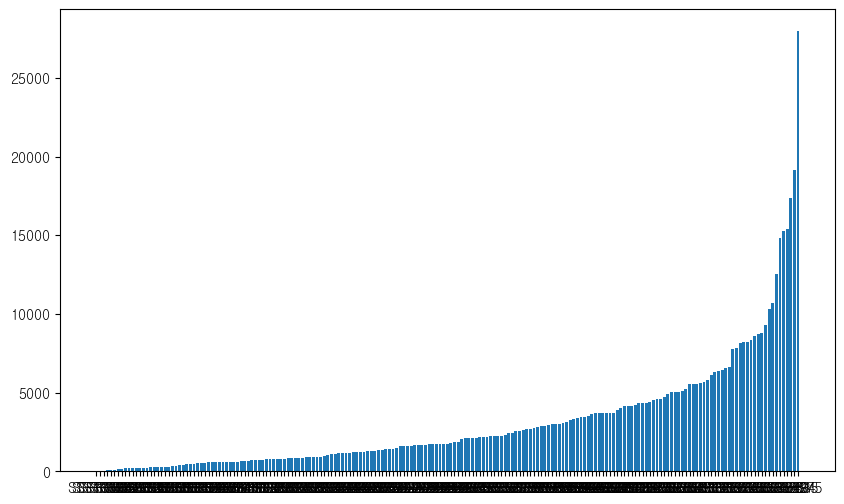

In [48]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(출퇴근_통합정보['대여소_ID'], 출퇴근_통합정보.sort_values(by='차이절대값합')['차이절대값합'])

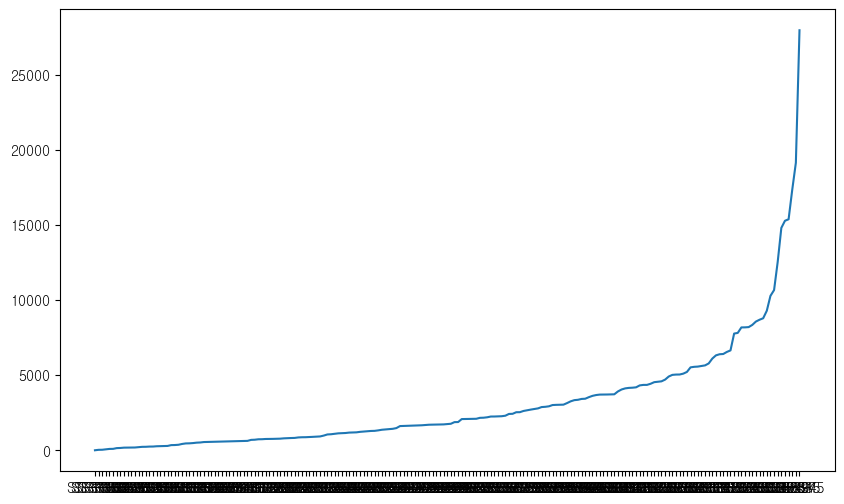

In [49]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(출퇴근_통합정보['대여소_ID'], 출퇴근_통합정보.sort_values(by='차이절대값합')['차이절대값합'])

In [50]:
출퇴근_통합정보

,대여소_ID,지구분류(출),지구분류(퇴),분류일치여부,시작(출),종료(출),차이(출),차이절대값(출),총이용량(출),시작(퇴),종료(퇴),차이(퇴),차이절대값(퇴),총이용량(퇴),차이절대값합,총이용량합
0,ST-1062,주거,주거,일치,3817,2303,1514,1514,6120,4052,5420,-1368,1368,9472,2882,15592
1,ST-1063,업무,업무,일치,5061,8806,-3745,3745,13867,5762,3109,2653,2653,8871,6398,22738
2,ST-1064,업무,업무,일치,3900,8571,-4671,4671,12471,8962,5449,3513,3513,14411,8184,26882
3,ST-1065,주거,주거,일치,5849,5590,259,259,11439,14935,16778,-1843,1843,31713,2102,43152
4,ST-1067,주거,주거,일치,3604,2990,614,614,6594,2700,3810,-1110,1110,6510,1724,13104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,ST-829,주거,업무,불일치,1344,1005,339,339,2349,1956,1923,33,33,3879,372,6228
191,ST-831,주거,주거,일치,2732,1538,1194,1194,4270,4079,4576,-497,497,8655,1691,12925
192,ST-834,업무,주거,불일치,3344,4368,-1024,1024,7712,6339,6460,-121,121,12799,1145,20511
193,ST-835,주거,주거,일치,4274,2164,2110,2110,6438,5497,7926,-2429,2429,13423,4539,19861


In [51]:
import pandas as pd
import re

# 숫자를 추출하여 새로운 컬럼에 할당하는 함수 정의
def extract_number(text):
    numbers = re.findall(r'\d+', text)  # 정규표현식을 사용하여 숫자 추출
    if numbers:
        return int(numbers[0])  # 추출된 숫자 중 첫 번째 숫자를 반환
    else:
        return None  # 숫자가 없는 경우 None 반환

# 대여소_ID 컬럼에서 숫자만 추출하여 새로운 컬럼에 할당
출퇴근_통합정보['숫자_대여소_ID'] = 출퇴근_통합정보['대여소_ID'].apply(extract_number)

출퇴근_통합정보

,대여소_ID,지구분류(출),지구분류(퇴),분류일치여부,시작(출),종료(출),차이(출),차이절대값(출),총이용량(출),시작(퇴),종료(퇴),차이(퇴),차이절대값(퇴),총이용량(퇴),차이절대값합,총이용량합,숫자_대여소_ID
0,ST-1062,주거,주거,일치,3817,2303,1514,1514,6120,4052,5420,-1368,1368,9472,2882,15592,1062
1,ST-1063,업무,업무,일치,5061,8806,-3745,3745,13867,5762,3109,2653,2653,8871,6398,22738,1063
2,ST-1064,업무,업무,일치,3900,8571,-4671,4671,12471,8962,5449,3513,3513,14411,8184,26882,1064
3,ST-1065,주거,주거,일치,5849,5590,259,259,11439,14935,16778,-1843,1843,31713,2102,43152,1065
4,ST-1067,주거,주거,일치,3604,2990,614,614,6594,2700,3810,-1110,1110,6510,1724,13104,1067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,ST-829,주거,업무,불일치,1344,1005,339,339,2349,1956,1923,33,33,3879,372,6228,829
191,ST-831,주거,주거,일치,2732,1538,1194,1194,4270,4079,4576,-497,497,8655,1691,12925,831
192,ST-834,업무,주거,불일치,3344,4368,-1024,1024,7712,6339,6460,-121,121,12799,1145,20511,834
193,ST-835,주거,주거,일치,4274,2164,2110,2110,6438,5497,7926,-2429,2429,13423,4539,19861,835


In [52]:
출퇴근_통합정보['temp_num'] = 출퇴근_통합정보.index.values+1

In [53]:
출퇴근_통합정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   대여소_ID     195 non-null    object
 1   지구분류(출)    195 non-null    object
 2   지구분류(퇴)    195 non-null    object
 3   분류일치여부     195 non-null    object
 4   시작(출)      195 non-null    int32 
 5   종료(출)      195 non-null    int32 
 6   차이(출)      195 non-null    int32 
 7   차이절대값(출)   195 non-null    int32 
 8   총이용량(출)    195 non-null    int32 
 9   시작(퇴)      195 non-null    int64 
 10  종료(퇴)      195 non-null    int64 
 11  차이(퇴)      195 non-null    int64 
 12  차이절대값(퇴)   195 non-null    int64 
 13  총이용량(퇴)    195 non-null    int64 
 14  차이절대값합     195 non-null    int64 
 15  총이용량합      195 non-null    int64 
 16  숫자_대여소_ID  195 non-null    int64 
 17  temp_num   195 non-null    int64 
dtypes: int32(5), int64(9), object(4)
memory usage: 23.7+ KB


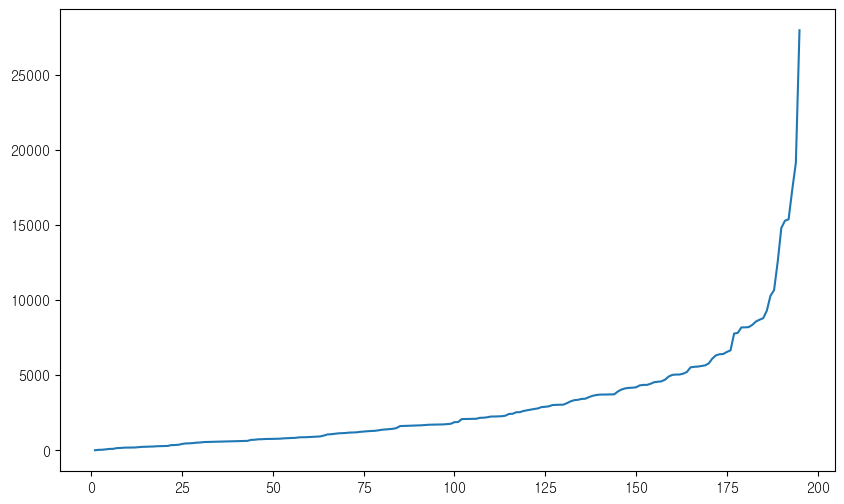

In [54]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(출퇴근_통합정보['temp_num'], 출퇴근_통합정보.sort_values(by='차이절대값합')['차이절대값합'])

미분 결과: cos(x)


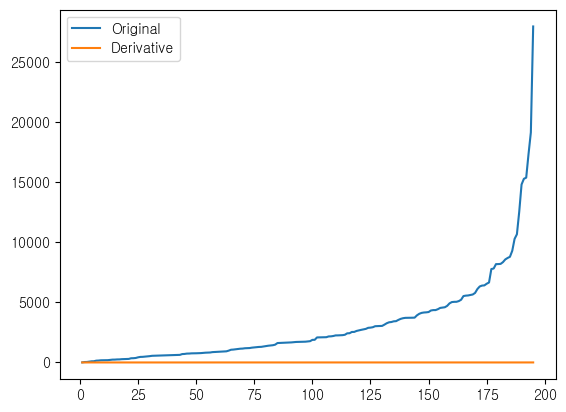

In [55]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = 출퇴근_통합정보['temp_num']
y = 출퇴근_통합정보.sort_values(by='차이절대값합')['차이절대값합']

sym_x = sp.symbols('x')
sym_y = sp.sin(sym_x)

dy_dx = sp.diff(sym_y, sym_x)

# 결과 출력
print("미분 결과:", dy_dx)

# 그래프 그리기
plt.plot(x, y, label='Original')
plt.plot(x, [dy_dx.subs(sym_x, val) for val in x], label='Derivative')
plt.legend()
plt.show()

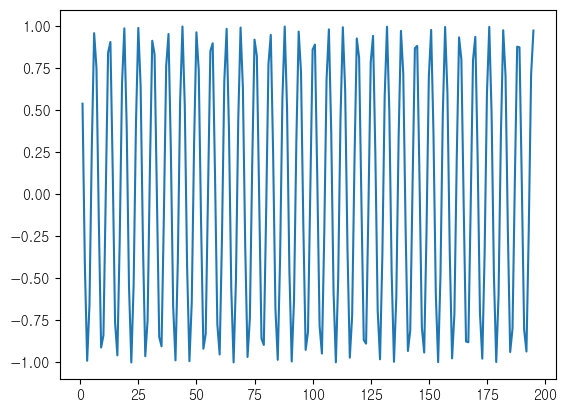

In [56]:
plt.plot(x, [dy_dx.subs(sym_x, val) for val in x], label='Derivative')

변화율 결과: [2.900e+01 5.000e+00 2.400e+01 3.100e+01 5.000e+00 4.900e+01 1.000e+01
 2.100e+01 1.000e+00 2.000e+00 7.000e+00 1.900e+01 2.500e+01 3.000e+00
 1.400e+01 3.000e+00 1.900e+01 9.000e+00 2.000e+00 1.000e+01 5.400e+01
 6.000e+00 1.800e+01 5.400e+01 3.500e+01 6.000e+00 1.800e+01 2.700e+01
 1.200e+01 2.900e+01 7.000e+00 1.000e+00 1.700e+01 6.000e+00 1.000e+01
 0.000e+00 2.000e+00 8.000e+00 1.500e+01 6.000e+00 3.000e+00 3.000e+00
 6.600e+01 1.100e+01 2.900e+01 4.000e+00 1.600e+01 1.000e+00 6.000e+00
 8.000e+00 6.000e+00 2.100e+01 1.300e+01 9.000e+00 7.000e+00 3.200e+01
 1.200e+01 3.000e+00 1.500e+01 9.000e+00 1.300e+01 1.400e+01 5.700e+01
 7.500e+01 1.400e+01 2.700e+01 3.300e+01 1.300e+01 1.000e+01 2.700e+01
 1.100e+01 6.000e+00 3.300e+01 2.000e+01 2.500e+01 1.400e+01 7.000e+00
 3.200e+01 4.100e+01 2.100e+01 1.800e+01 2.400e+01 4.800e+01 1.340e+02
 8.000e+00 1.000e+01 1.000e+00 1.300e+01 1.200e+01 9.000e+00 2.200e+01
 1.500e+01 4.000e+00 7.000e+00 7.000e+00 4.000e+00 1.800e+01 2.400e+0

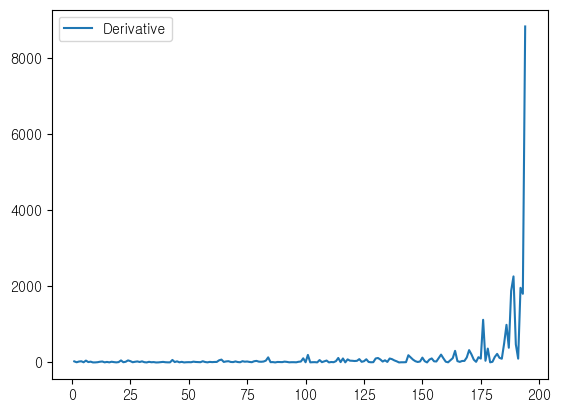

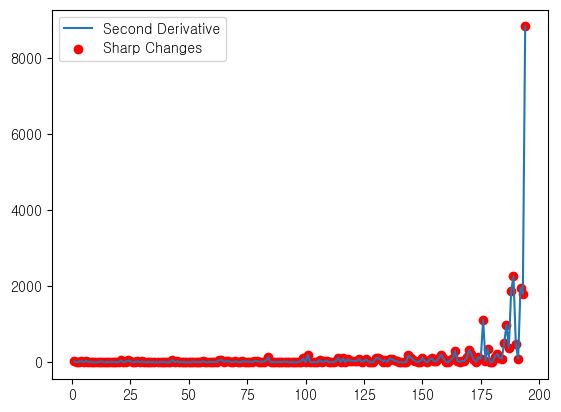

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# 라인 그래프 데이터 생성
x = 출퇴근_통합정보['temp_num']
y = 출퇴근_통합정보.sort_values(by='차이절대값합')['차이절대값합']

# 변화율 계산
dx = x[1] - x[0]
dy = np.diff(y) / dx

# 결과 출력
print("변화율 결과:", dy)

# 그래프 그리기
plt.plot(x[:-1], dy, label='Derivative')
plt.legend()
plt.show()

# 급격한 변화를 찾기 위해 변화율의 변화율이 특정 임계값 이상인 지점을 찾습니다.
threshold = 0.5  # 임계값 설정
sharp_changes = np.where(np.abs(dy) > threshold)[0]

# 찾은 지점을 그래프에 표시합니다.
plt.plot(x[:-1], dy, label='Second Derivative')
plt.scatter(x[sharp_changes], dy[sharp_changes], color='red', label='Sharp Changes')
plt.legend()
plt.show()

In [58]:
출퇴근_통합정보.sort_values(by='차이절대값합')['차이절대값합']

160        6
159       35
92        40
172       64
161       95
       ...  
153    15284
147    15384
41     17344
61     19146
59     27966
Name: 차이절대값합, Length: 195, dtype: int64

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


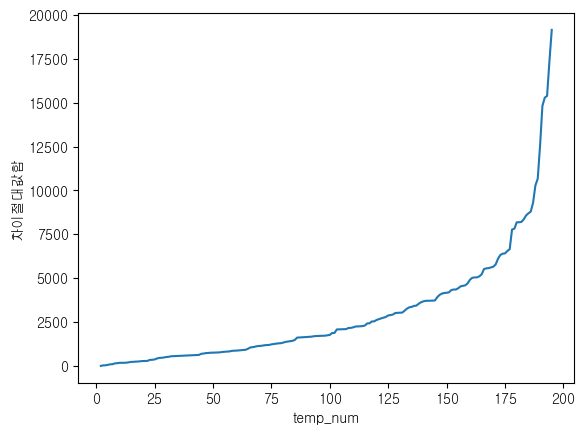

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

x=출퇴근_통합정보['temp_num']
y=출퇴근_통합정보.sort_values(by='차이절대값합')['차이절대값합']

y.index = 출퇴근_통합정보['temp_num'].values

# 라인 플롯 그리기
sns.lineplot(x=x, y=y)
plt.show()

In [64]:
import plotly.graph_objects as go

# 데이터 생성
x = 출퇴근_통합정보['temp_num']
y = 출퇴근_통합정보.sort_values(by='차이절대값합')['차이절대값합']

# 미분 진행
dx = x[1] - x[0]
dy = np.diff(y) / dx

line_color = '#336666'
line_color2 = '#33cc99'

# 그래프 그리기
fig = go.Figure(data=go.Scatter(x=x, y=y, name='대여소별 쏠림 정도값', line=dict(color=line_color)))

fig.add_trace(go.Scatter(x=x[:-1], y=dy, mode='lines', name='데이터별 미분값', line=dict(color=line_color2)))

fig.update_layout(title='강서구 대여소 별 쏠림 정도 정렬 & 각 지점 미분')
fig.update_layout(xaxis_title='대여소 임시번호', yaxis_title='쏠림 정도')
fig.update_layout(width=800, height=600)

fig.show()

<BarContainer object of 195 artists>

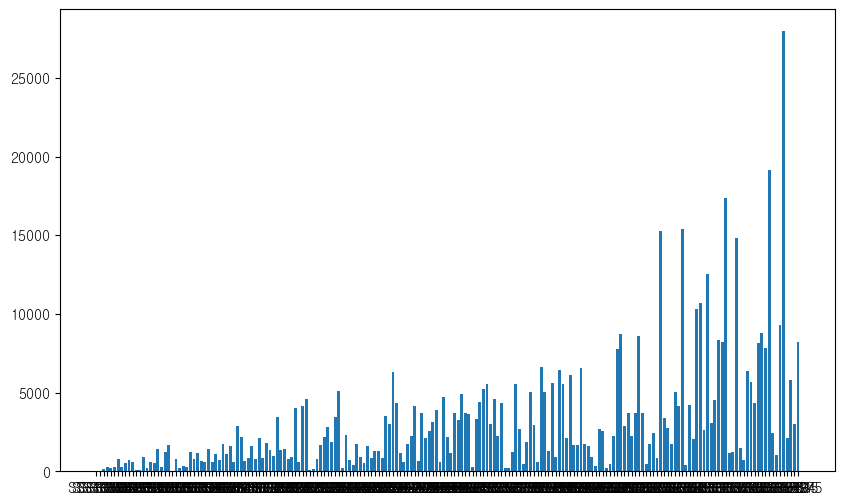

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(출퇴근_통합정보['대여소_ID'], 출퇴근_통합정보.sort_values(by='총이용량합')['차이절대값합'])

In [ ]:
len(출퇴근_통합정보[출퇴근_통합정보['지구분류(출)']=='주거']['대여소_ID'].values)

122

In [ ]:
len(출퇴근_통합정보[출퇴근_통합정보['지구분류(출)']=='업무']['대여소_ID'].values)

72

In [ ]:
len(출퇴근_통합정보[출퇴근_통합정보['지구분류(퇴)']=='주거']['대여소_ID'].values)

113

In [ ]:
len(출퇴근_통합정보[출퇴근_통합정보['지구분류(퇴)']=='업무']['대여소_ID'].values)

81

{'whiskers': [<matplotlib.lines.Line2D at 0x1e019a3f3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e019a560d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e01997d290>],
 'medians': [<matplotlib.lines.Line2D at 0x1e019a9d210>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e019a9da90>],
 'means': []}

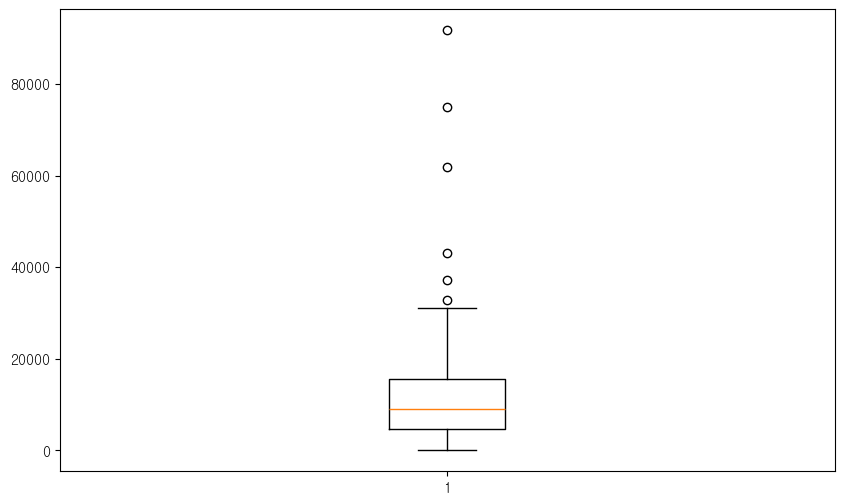

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(출퇴근_통합정보['총이용량합'])

대여소 별 총이용량합 박스플롯

In [ ]:
import plotly.express as px

fig = px.box(data_frame= 출퇴근_통합정보, y="총이용량합", points='all')

fig.show()

대여소 별 차이절대값합 박스플롯

In [ ]:
fig = px.box(data_frame= 출퇴근_통합정보, y="차이절대값합", points='all')

fig.show()